# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hafiz Caniago
- **Email:** hafizcode02@gmail.com
- **ID Dicoding:** hafizcaniago

## Menentukan Pertanyaan Bisnis

- Pada Musim Apa Tren Penggunaan Sepeda Rental mencapai tingkat tertinggi?
- Pada Jam Berapa tren penggunaan sepeda rental mencapai nilai tertinggi dalam satu hari?
- Bagaimana Tren Pengguna Sepeda tiap bulan berdasarkan jenis penyewanya (Registrasi dan Biasa)?
- Seberapa besar pengaruh cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

> Pada tahap ini, kita akan melakukan load data dari dataset



In [105]:
# Memuat Dataset & Preview Data
# Bike Sharing per hari
df_day = pd.read_csv('day.csv');
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [106]:
# Bike Sharing per jam
df_hour = pd.read_csv('hour.csv');
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

- Terdapat dua dataset yang digunakan dari bike sharing dataset yaitu dataset day dan dataset hour.



### Assessing Data

In [107]:
# Mengecek Info Detail dari Dataset Hour dan Apakah terdapat data kosong
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [108]:
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [109]:
# Mengecek Info Detail dari Dataset Hour dan Apakah terdapat data kosong
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [110]:
df_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [111]:
# Mengecek Jumlah Duplikasi Data
print("Jumlah Duplikasi Dataset Hour : ", df_hour.duplicated().sum())
print("Jumlah Duplikasi Dataset Day : ", df_day.duplicated().sum())

Jumlah Duplikasi Dataset Hour :  0
Jumlah Duplikasi Dataset Day :  0


In [112]:
# Mengecek Apakah ada Keanehan dari Nilai Statistik di Dataset Hour
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [113]:
# Mengecek Apakah ada Keanehan dari Nilai Statistik di Dataset Daay
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dataset Day & Hour tidak memiliki nilai kosong
- Dataset Day & Hour tidak memiliki nilai duplikat
- Dataset Day & Hour tidak terindikasi nilai statistik yang aneh.

### Cleaning Data

In [114]:
# Merubah Kolom dteday menjadi format date dari object
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [115]:
# Menghapus kolom instant karena tidak diperlukan
df_day = df_day.drop(columns=['instant'])
df_hour = df_hour.drop(columns=['instant'])

In [116]:
# Merubah nama kolom agar lebih jelas
df_day.rename(columns={
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'atemp': 'apparent_temperature',
    'hum': 'humidity',
}, inplace=True)

In [117]:
# Merubah nama kolom agar lebih jelas
df_hour.rename(columns={
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'atemp': 'apparent_temperature',
    'hum': 'humidity',
}, inplace=True)

In [118]:
# Konversi Nilai pada data jadi bersifat kategorikal
df_day['season'] = df_day['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df_hour['season'] = df_hour['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

df_day['month'] = df_day['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
df_hour['month'] = df_hour['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

df_day['weather_situation'] = df_day['weather_situation'].map({1: 'Clear', 2: 'Misty', 3: 'Light Rain', 4: 'Heavy Rain'})
df_hour['weather_situation'] = df_hour['weather_situation'].map({1: 'Clear', 2: 'Misty', 3: 'Light Rain', 4: 'Heavy Rain'})

df_day['weekday'] = df_day['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df_hour['weekday'] = df_hour['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

df_day['year'] = df_day['year'].map({0: '2011', 1: '2012'})
df_hour['year'] = df_hour['year'].map({0: '2011', 1: '2012'})

df_day['humidity'] = df_day['humidity']*100
df_hour['humidity'] = df_hour['humidity']*100

In [119]:
df_day.head()

,date,season,year,month,holiday,weekday,workingday,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,Jan,0,Saturday,0,Misty,0.344167,0.363625,80.5833,0.160446,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sunday,0,Misty,0.363478,0.353739,69.6087,0.248539,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Monday,1,Clear,0.196364,0.189405,43.7273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tuesday,1,Clear,0.200000,0.212122,59.0435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wednesday,1,Clear,0.226957,0.229270,43.6957,0.186900,82,1518,1600


In [120]:
df_hour.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,81.0,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,80.0,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,80.0,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,75.0,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,75.0,0.0,0,1,1


**Insight**:
- Penghapusan kolom instant karena tidak digunakan
- perubahan tipe data kolom dteday karena seharusnya tipe datanya date bukan object
- perubahan penamaan kolom agar lebih mudah dibaca

## Exploratory Data Analysis (EDA)

### Explore Tren Pengguna Berdasarkan Musim

In [121]:
# Melihat jumlah penggunaan sepeda berdasarkan musim
season_trend = df_day.groupby('season')[['cnt', 'casual', 'registered']].sum().reset_index()
print("\nTren Penggunaan Sepeda per Musim:")
print(season_trend)


Tren Penggunaan Sepeda per Musim:
   season      cnt  casual  registered
0    Fall  1061129  226091      835038
1  Spring   471348   60622      410726
2  Summer   918589  203522      715067
3  Winter   841613  129782      711831


**Insight** : Dari Informasi tersebut, musim dengan penyewaan terbanyak pada Musim Gugur. dan terendah di Musim Semi.

### Explore Tren Pengguna Berdasarkan Jam

In [122]:
# Melihat Tren Rata Rata Penyewaan sepeda berdasarkan jam
hourly_trend = df_hour.groupby('hour')[['cnt', 'casual', 'registered']].mean().reset_index()
print("\nTren Penggunaan Sepeda per Jam:")
print(hourly_trend)


Tren Penggunaan Sepeda per Jam:
    hour         cnt     casual  registered
0      0   53.898072  10.158402   43.739669
1      1   33.375691   6.504144   26.871547
2      2   22.869930   4.772028   18.097902
3      3   11.727403   2.715925    9.011478
4      4    6.352941   1.253945    5.098996
5      5   19.889819   1.411437   18.478382
6      6   76.044138   4.161379   71.882759
7      7  212.064649  11.055021  201.009629
8      8  359.011004  21.679505  337.331499
9      9  219.309491  30.891334  188.418157
10    10  173.668501  46.477304  127.191197
11    11  208.143054  59.540578  148.602476
12    12  253.315934  68.293956  185.021978
13    13  253.661180  72.308642  181.352538
14    14  240.949246  75.567901  165.381344
15    15  251.233196  74.905350  176.327846
16    16  311.983562  73.745205  238.238356
17    17  461.452055  74.273973  387.178082
18    18  425.510989  61.120879  364.390110
19    19  311.523352  48.770604  262.752747
20    20  226.030220  36.233516  189.796703

**Insight** : Dari Informasi tersebut, jam 5 sore menjadi waktu terpadat penyewaan sepeda dan jam 4 pagi menjadi yang tersepi.

### Explore Tren Pengguna Berdasarkan Hari

In [123]:
# Penggunaan sepeda setiap hari
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_trend = df_day.groupby('weekday')[['cnt', 'casual', 'registered']].mean().reindex(weekday_order).reset_index()
print("\nPenggunaan Sepeda per Hari:")
print(weekday_trend)


Penggunaan Sepeda per Hari:
     weekday          cnt       casual   registered
0     Sunday  4228.828571  1338.295238  2890.533333
1     Monday  4338.123810   674.133333  3663.990476
2    Tuesday  4510.663462   556.182692  3954.480769
3  Wednesday  4548.538462   551.144231  3997.394231
4   Thursday  4667.259615   590.961538  4076.298077
5     Friday  4690.288462   752.288462  3938.000000
6   Saturday  4550.542857  1465.257143  3085.285714


**Insight** : Dari Informasi tersebut, hari jumat menjadi hari terpadat, dan hari minggu menjadi hari tersepi

### Explore Tren Pengguna Berdasarkan Bulan

In [124]:
# Perbandingan jumlah pengguna registered dan casual setiap bulan
monthly_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_trend = df_day.groupby('month')[['cnt', 'casual', 'registered']].sum().reindex(monthly_order).reset_index()
print("\nPerbandingan Jumlah Pengguna Registered dan Casual per Bulan:")
print(monthly_trend)


Perbandingan Jumlah Pengguna Registered dan Casual per Bulan:
   month     cnt  casual  registered
0    Jan  134933   12042      122891
1    Feb  151352   14963      136389
2    Mar  228920   44444      184476
3    Apr  269094   60802      208292
4    May  331686   75285      256401
5    Jun  346342   73906      272436
6    Jul  344948   78157      266791
7    Aug  351194   72039      279155
8    Sep  345991   70323      275668
9    Oct  322352   59760      262592
10   Nov  254831   36603      218228
11   Dec  211036   21693      189343


**Insight** : Dari Informasi tersebut, bulan Agustus menjadi bulan paling ramai untuk penyewaan sepeda dan januari paling sepi.

### Explore Tren Pengguna Sepeda Berdasarkan Cuaca

In [125]:
weather_situation_trend = df_hour.groupby('weather_situation')[['cnt', 'casual', 'registered']].mean().reset_index()
print("\nTren Penggunaan Sepeda Berdasarkan Cuaca:")
print(weather_situation_trend)


Tren Penggunaan Sepeda Berdasarkan Cuaca:
  weather_situation         cnt     casual  registered
0             Clear  204.869272  40.545431  164.323841
1        Heavy Rain   74.333333   2.666667   71.666667
2        Light Rain  111.579281  16.055673   95.523608
3             Misty  175.165493  29.595290  145.570202


**Insight** : Dari Informasi tersebut, Cuaca Cerah menjadi yang paling ramai

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada Musim Apa Tren Penggunaan Sepeda Rental mencapai tingkat tertinggi?


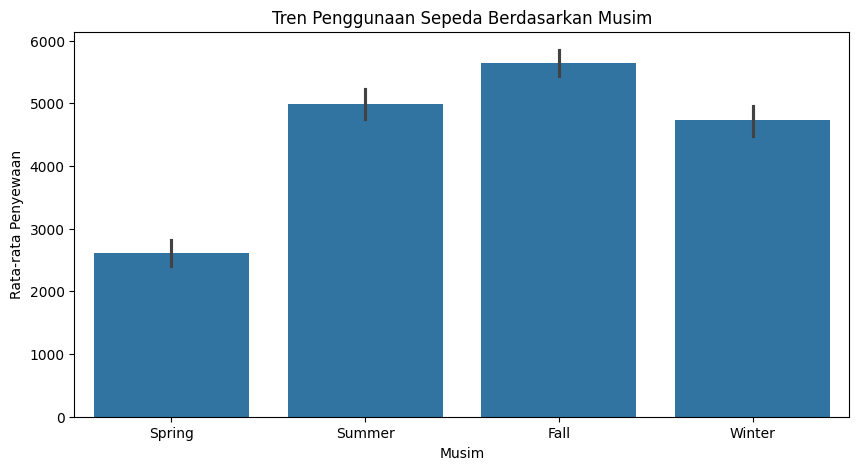

In [126]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_day, x='season', y='cnt')
plt.title('Tren Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

**Insight** : Visualisasi menunjukan bahwa penyewaan sepeda tertinggi terjadi pada musim gugur, disusul oleh musim panas, musim dingin, dan musim semi.

### Pertanyaan 2: Pada Jam Berapa tren penggunaan sepeda rental mencapai nilai tertinggi dalam satu hari?

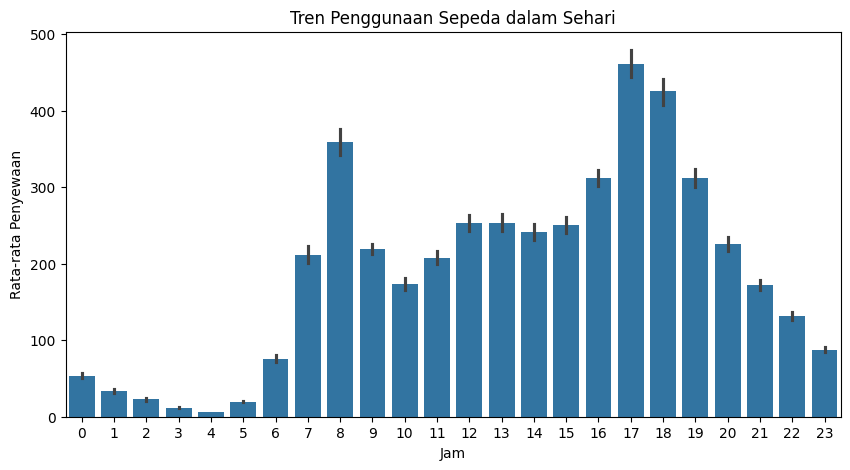

In [127]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_hour, x='hour', y='cnt')
plt.title('Tren Penggunaan Sepeda dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

**Insight** : Visualisasi menunjukan bahwa penyewaan sepeda tertinggi terjadi pada jam 5 sore dan terendah pada jam 4 pagi.

### Pertanyaan 3 : Bagaimana Tren Rata Rata Pengguna Sepeda tiap bulan berdasarkan jenis penyewanya (Registrasi dan Biasa)?

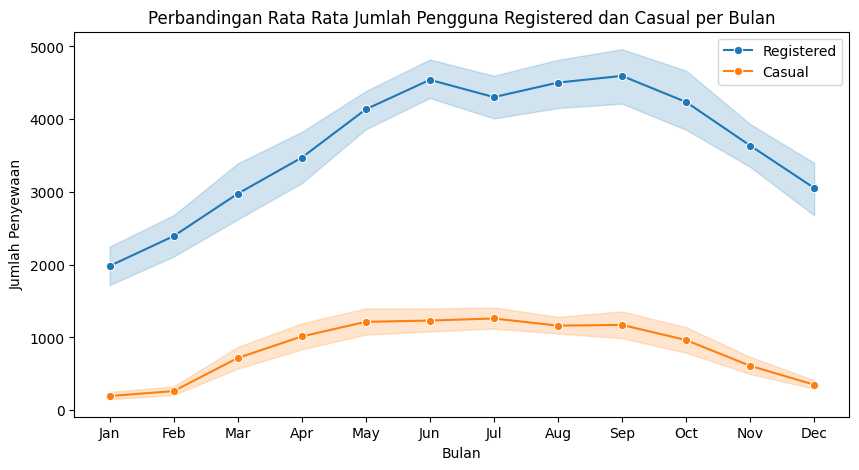

In [128]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_day, x='month', y='registered', label='Registered', marker='o')
sns.lineplot(data=df_day, x='month', y='casual', label='Casual', marker='o')
plt.title('Perbandingan Rata Rata Jumlah Pengguna Registered dan Casual per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.legend()
plt.show()

**Insight** : Visualisasi menunjukan bahwa penyewaan sepeda berdasarkan jenis penyewanya setiap bulan di dominasi oleh pengguna yang teregistrasi dari pada casual

### Pertanyaan 4: Seberapa besar pengaruh cuaca terhadap jumlah penyewaan sepeda?

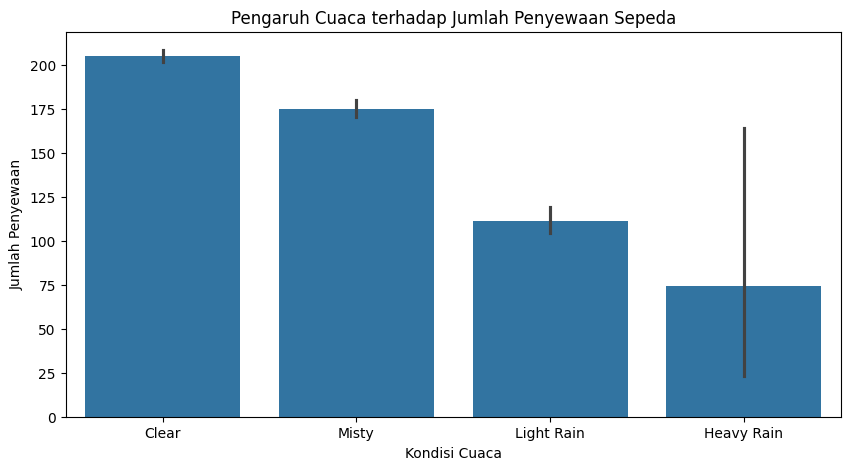

In [129]:
plt.figure(figsize=(10, 5))
sns.barplot(x='weather_situation', y='cnt', data=df_hour)
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:** : visualisasi menunjukan bahwa cuaca cerah yang cerah memiliki banyak jumlah transaksi penyewaan sepeda dari pada yang lain.

## Conclusion

Pertanyaan 1 : Pada Musim Apa Tren Penggunaan Sepeda Rental mencapai tingkat tertinggi?
- Conclusion : Terjadi Peningkatan Jumlah Penyewaan sepeda pada musim Gugur, Disusul Musim Panas, Musim Dingin, dan Musim Semi.

Pertanyaan 2 : Pada Jam Berapa tren penggunaan sepeda rental mencapai nilai tertinggi dalam satu hari?
- Conclusion : Dari Analisis dan Visualisasi yang didapat, Jam Jam Sore hari menjadi waktu penyewaan sepeda terpadat terutama pada jam 5 sore, sedangkan pagi hari menjadi waktu penyewaan sepeda tersepi terutama pada jam 4 pagi.

Pertanyaan 3 : Bagaimana Tren Pengguna Sepeda tiap bulan berdasarkan jenis penyewanya (Registrasi dan Biasa)?
- Conclusion : Dari analisis dan Visualisasi yang didapat, Tren Pengguna Pada Setiap bulan didominasi oleh user yang sudah teregistrasi di bandingkan user yang belum teregistrasi.

Pertanyaan 4 : Seberapa besar pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Conclusion : Berdasarkan analisis dan visualisasi yang didapat, cuaca sangat berpengaruh dalam transaksi penyewaan sepeda ditunjukan dengan jumlah transaksi penyewaan yang paling tinggi pada saat cuaca cerah, atau berkabut. sedangkan rendah pada cuaca hujan ringan dan hujan badai.

In [130]:
df_day.to_csv('day_clean.csv', index=False)
df_hour.to_csv('hour_clean.csv', index=False)